In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [2]:
df = pd.read_pickle(r"../base_processed.pkl")

>Чистка по квартилям, для того чтобы было более гладкое достоверное распределение доходов

In [3]:
Q1 = df.in_total_5ms_amt.quantile(0.25)
Q3 = df.in_total_5ms_amt.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df.in_total_5ms_amt < (Q1 - 1.5 * IQR)) |(df.in_total_5ms_amt > (Q3 + 1.5 * IQR)))]

C:\Users\koran\AppData\Local\Temp\ipykernel_9912\1887528955.py:4: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  sns.barplot(pd.melt(pl.from_pandas(df).groupby("age_category").agg(


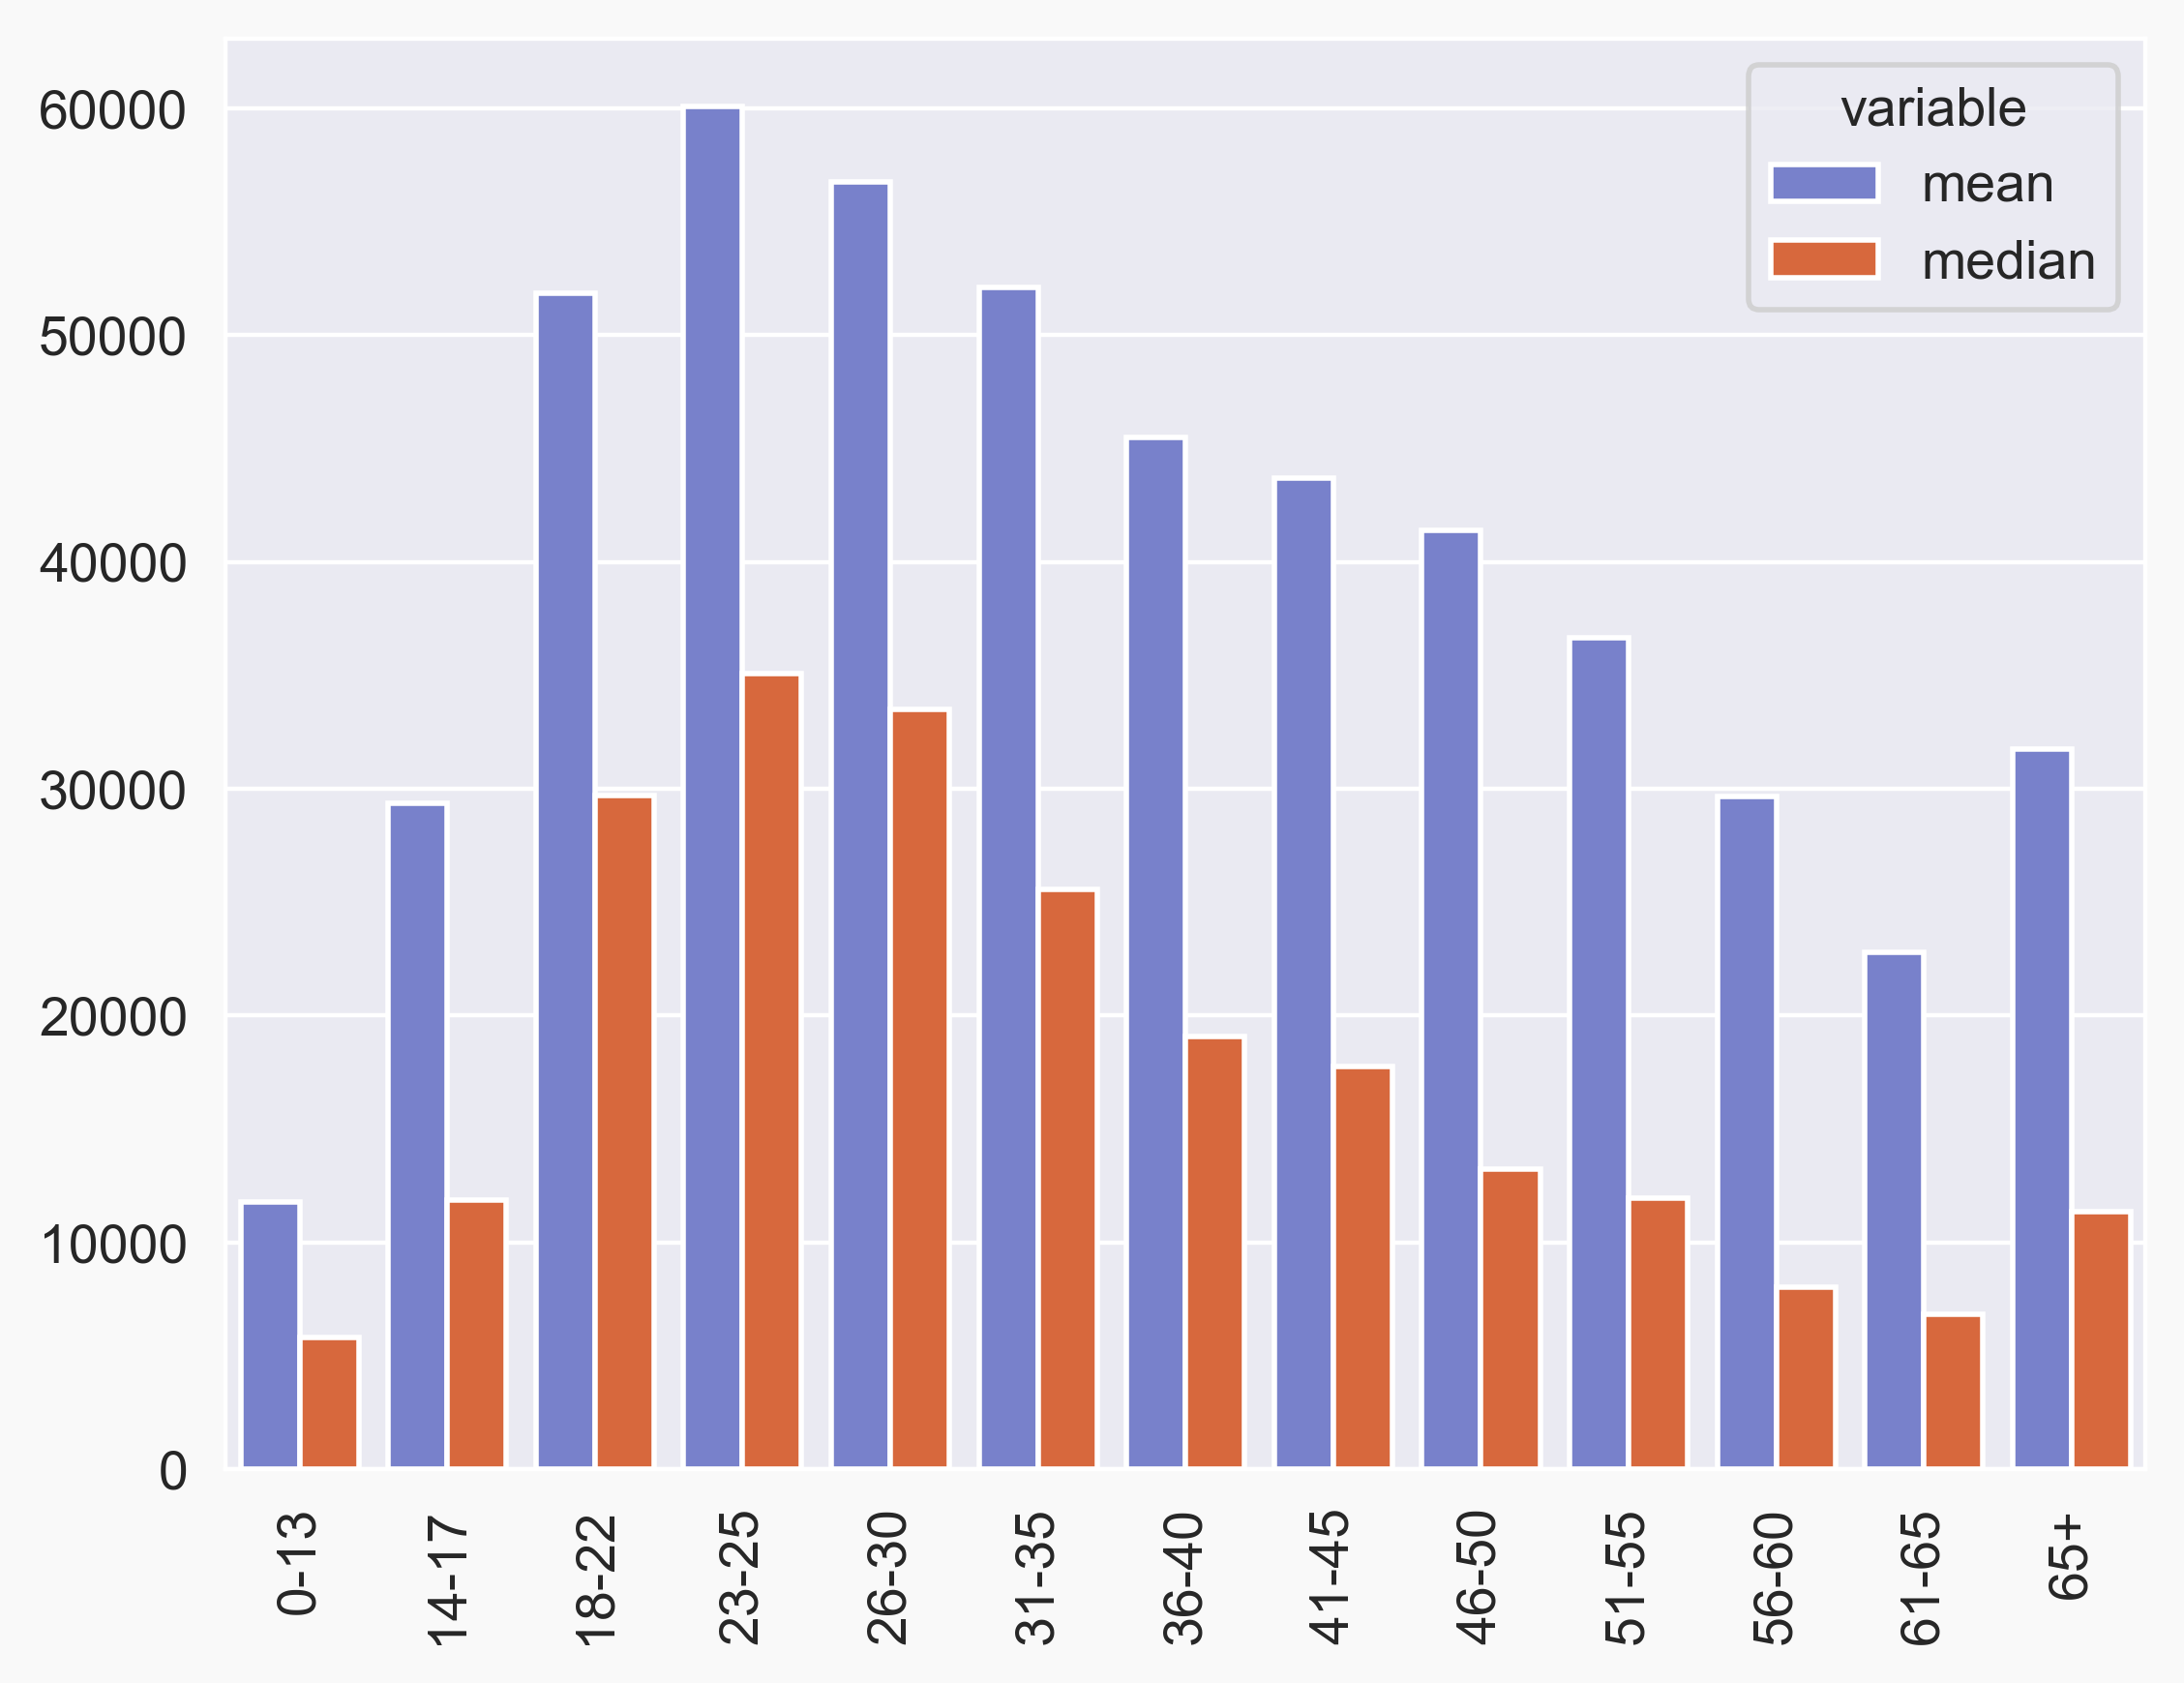

In [4]:
sns.set_style("darkgrid", rc={'figure.facecolor': 'F9F9F9'})
fig, ax = plt.subplots(dpi = 400)
new_column = ['0-13','14-17','18-22','23-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','65+']
sns.barplot(pd.melt(pl.from_pandas(df).groupby("age_category").agg(
    mean = (pl.col("in_total_5ms_amt")/5).mean(),
    median = (pl.col("in_total_5ms_amt")/5).median(),
    percent25 = (pl.col("in_total_5ms_amt")/5).quantile(0.25),
    percent75 = (pl.col("in_total_5ms_amt")/5).quantile(0.75)
).sort(by="age_category").to_pandas(), id_vars="age_category", value_vars=["mean", "median"]),
x = "age_category", y = "value", hue="variable", palette = ["#6A76D9", "#F05C24"])
ax.set_xticklabels(new_column, rotation = 90)
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.savefig("../images/in_total_5ms_amt_per_age_category.png")

C:\Users\koran\AppData\Local\Temp\ipykernel_9912\1700118754.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  plot = sns.barplot(data = pd.melt(pl.from_pandas(df).groupby("age_category").agg(


[Text(0, 0, '0-13'),
 Text(1, 0, '14-17'),
 Text(2, 0, '18-22'),
 Text(3, 0, '23-25'),
 Text(4, 0, '26-30'),
 Text(5, 0, '31-35'),
 Text(6, 0, '36-40'),
 Text(7, 0, '41-45'),
 Text(8, 0, '46-50'),
 Text(9, 0, '51-55'),
 Text(10, 0, '56-60'),
 Text(11, 0, '61-65'),
 Text(12, 0, '65+')]

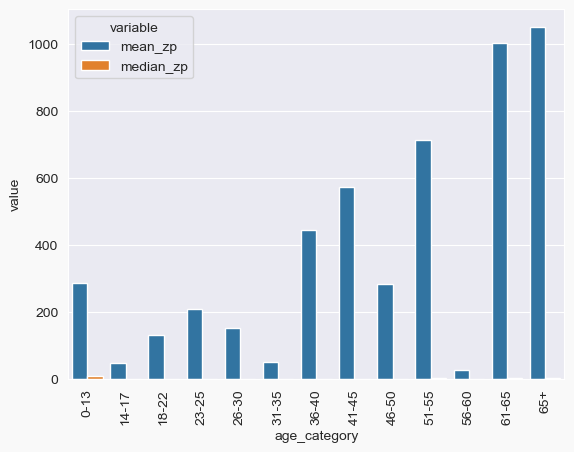

In [5]:
plot = sns.barplot(data = pd.melt(pl.from_pandas(df).groupby("age_category").agg(
    mean_zp = ((pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt"))/5).mean(),
    median_zp = ((pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt"))/5).median(),
    percent25 = ((pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt"))/5).quantile(0.25),
    percent75 = ((pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt"))/5).quantile(0.75)
).sort(by="age_category").to_pandas(),
id_vars="age_category", value_vars=["mean_zp", "median_zp"]),
x = "age_category", y = "value", hue="variable")
plot.set_xticklabels(new_column, rotation = 90)

><sup>Не изспользуется в презентации</sup>